In [1]:
import _functions

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# PREPROCESSING
label -> dummies

In [3]:
df_TESS = pd.read_csv('TESS_mfcc20_labels.csv')
df_RAVDESS = pd.read_csv('RAVDESS_mfcc20_labels.csv')

In [4]:
df = pd.concat([df_TESS, df_RAVDESS], ignore_index=True)

In [5]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle

In [6]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-484.28152,190.620290,-19.982420,-7.379053,6.886962,9.451779,-32.918880,-4.751101,-5.306405,-14.028688,...,-15.967937,5.257388,-3.434334,-7.524569,2.931761,-11.234414,-19.252283,4.021437,2.462507,surprise
1,-423.34738,128.137880,-38.736576,-2.538193,-5.109863,-5.815287,-25.097466,4.818570,-9.883142,-21.609966,...,-9.362042,-5.840129,-11.062403,-23.802397,-13.001789,-21.210798,-9.840059,-8.376751,-7.290752,happy
2,-413.89697,119.661860,45.043938,16.279648,-25.634290,18.136494,32.434470,-10.117468,-7.974312,-4.156151,...,-5.352430,-9.005486,6.942813,-21.959146,-5.929955,1.105549,-12.421453,5.662510,-12.030071,sad
3,-401.95910,107.207634,-33.677914,6.929764,-39.821465,-9.657510,-24.399527,7.633095,-8.682779,-1.229950,...,-17.266747,2.633279,-18.141802,-13.803773,-5.842812,-22.223478,-1.547133,-15.708506,-12.984270,fear
4,-1130.40670,0.620979,0.601525,0.380030,0.384768,-0.146482,-0.242339,0.198292,-0.088879,-0.029896,...,0.228551,-0.098887,-0.080663,0.048334,0.038808,-0.045400,-0.018891,0.030010,0.016930,sad


In [10]:
labels = df['label'].unique()
labels

array(['surprise', 'happy', 'sad', 'fear', 'angry', 'disgust', 'neutral'],
      dtype=object)

In [11]:
# Create a LabelEncoder and fit it with the original labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [13]:
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [9]:
df = pd.get_dummies(df, columns=['label'])

In [10]:
label_columns = [col for col in df.columns if col.startswith('label_')]

In [11]:
X = df.drop(columns=label_columns)
Y = df[label_columns]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2
)

# MODELS 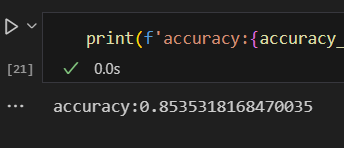

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [14]:
model_rf = RandomForestClassifier(random_state=42)

In [15]:
# Randomized Search CV
parameters = {
    'n_estimators': [200],
    'max_depth': [24]
}


In [16]:
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=parameters, n_iter=10, cv=3, verbose=2, n_jobs=-1)

In [17]:
random_search.fit(X=X_train, y=Y_train)

c:\Users\tranh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [24],
                                        'n_estimators': [200]},
                   verbose=2)

In [18]:
joblib.dump(random_search, 'randomForestModel.joblib')

['randomForestModel.joblib']

In [28]:
# random_search.best_estimator_ # max_depth=16, n_estimators=200

RandomForestClassifier(max_depth=16, n_estimators=200, random_state=42)

In [19]:
Y_pred = random_search.predict(X=X_test)

In [20]:
# Convert one-hot encoded predictions back to labels
Y_pred_labels = Y_pred.argmax(axis=1)
Y_test_labels = Y_test.values.argmax(axis=1)

In [33]:
print(f'accuracy:{accuracy_score(y_true=Y_test_labels, y_pred=Y_pred_labels):.2%}')

accuracy:85.35%
